In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import os
import scipy.stats as sp


In [2]:
csv_path = "Resources/openpowerlifting-2019-2020.csv"
powerlifting_base = pd.read_csv(csv_path)
print(type(powerlifting_base))

powerlifting_base.head()

#powerlifting_base.drop_duplicates()
#powerlifting_base.info()


C:\Users\j1-ag\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>


,name,sex,event,equipment,age,ageclass,birthyearclass,division,bodyweightkg,weightclasskg,...,goodlift,tested,country,federation,parentfederation,date,meetcountry,meetstate,meettown,meetname
0,Tucker Sanders,M,B,Single-ply,15.0,13-15,14-18,Teen 14-15,52.0,52,...,49.90,NaN,USA,USABPA,NaN,4/6/2019,USA,TX,Ft. Worth,Ronnie Coleman Classic
1,Xander Womack,M,B,Single-ply,14.0,13-15,14-18,Teen 14-15,100.0,100,...,51.67,NaN,USA,USABPA,NaN,4/6/2019,USA,TX,Ft. Worth,Ronnie Coleman Classic
2,Michael Womack III,M,B,Single-ply,16.0,16-17,14-18,Teen 16-17,67.5,67.5,...,46.65,NaN,USA,USABPA,NaN,4/6/2019,USA,TX,Ft. Worth,Ronnie Coleman Classic
3,Logan McCurley,M,B,Single-ply,16.0,16-17,14-18,Teen 16-17,75.0,75,...,45.24,NaN,USA,USABPA,NaN,4/6/2019,USA,TX,Ft. Worth,Ronnie Coleman Classic
4,Emily Jondron,F,B,Single-ply,21.0,20-23,19-23,Juniors 20-25,90.0,90,...,81.45,NaN,USA,USABPA,NaN,4/6/2019,USA,TX,Ft. Worth,Ronnie Coleman Classic


In [3]:
#number of unique values

unique_counts = pd.DataFrame.from_records([(col, powerlifting_base[col].nunique()) for col in powerlifting_base.columns],
                                         columns = ['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
31,tested,1
1,sex,3
3,equipment,6
2,event,7
6,birthyearclass,7
5,ageclass,16
34,parentfederation,18
36,meetcountry,71
26,place,125
9,weightclasskg,135


In [8]:
#change the Dtypes of some columns

powerlifting_base['Age'] = powerlifting_base['age'].astype('float32')
powerlifting_base['Federation'] = powerlifting_base['federation'].astype('category')
powerlifting_base['Equipment'] = powerlifting_base['equipment'].astype('category')
powerlifting_base['Sex'] = powerlifting_base['sex'].astype('category')
powerlifting_base['AgeClass'] = powerlifting_base['ageclass'].astype('category')
powerlifting_base['Event'] = powerlifting_base['event'].astype('category')
powerlifting_base['Country'] = powerlifting_base['country'].astype('category')
powerlifting_base['MeetCountry'] = powerlifting_base['meetcountry'].astype('category')
powerlifting_base.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322532 entries, 0 to 322531
Data columns (total 48 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   name              322532 non-null  object  
 1   sex               322532 non-null  object  
 2   event             322532 non-null  object  
 3   equipment         322532 non-null  object  
 4   age               190741 non-null  float64 
 5   ageclass          216976 non-null  object  
 6   birthyearclass    190117 non-null  object  
 7   division          322468 non-null  object  
 8   bodyweightkg      319858 non-null  float64 
 9   weightclasskg     317378 non-null  object  
 10  squat1kg          109425 non-null  float64 
 11  squat2kg          108497 non-null  float64 
 12  squat3kg          105901 non-null  float64 
 13  squat4kg          697 non-null     float64 
 14  best3squatkg      238672 non-null  float64 
 15  bench1kg          152433 non-null  float64 
 16  be

In [10]:
#create cleaner table
columns = ['equipment', 'age', 'country', 'division', 'bodyweightkg', 'weightclasskg', 'best3squatkg', 'best3deadliftkg', 'best3benchkg', 'totalkg', 'place', 'sex']
powerlifting_base = powerlifting_base[columns]
powerlifting_base.head()

,equipment,age,country,division,bodyweightkg,weightclasskg,best3squatkg,best3deadliftkg,best3benchkg,totalkg,place,sex
0,Single-ply,15.0,USA,Teen 14-15,52.0,52,NaN,NaN,85.0,85.0,1,M
1,Single-ply,14.0,USA,Teen 14-15,100.0,100,NaN,NaN,162.5,162.5,1,M
2,Single-ply,16.0,USA,Teen 16-17,67.5,67.5,NaN,NaN,110.0,110.0,1,M
3,Single-ply,16.0,USA,Teen 16-17,75.0,75,NaN,NaN,117.5,117.5,1,M
4,Single-ply,21.0,USA,Juniors 20-25,90.0,90,NaN,NaN,160.0,160.0,1,F


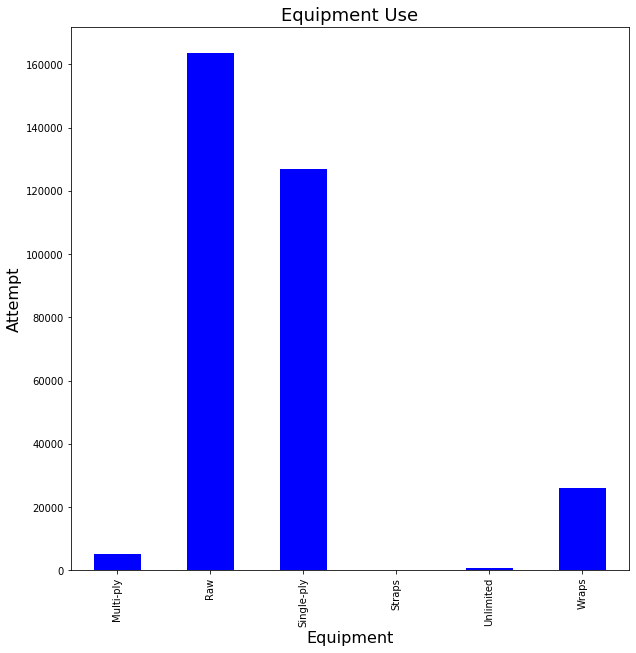

In [15]:
bar_data = powerlifting_base.groupby('equipment').count()['sex']
ax = bar_data.plot.bar(figsize=(10,10), width=.5, color='blue')


ax.set_title(f"Equipment Use", fontsize = 18)
ax.set_xlabel("Equipment", fontsize = 16)
ax.set_ylabel("Attempt", fontsize = 16)

plt.savefig("visualizations/equipment_use.png")

In [16]:
powerlifting_base.groupby(['equipment'])['bodyweightkg', 'totalkg'].mean()

C:\Users\j1-ag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,bodyweightkg,totalkg
equipment,,
Multi-ply,98.259210,387.216057
Raw,83.891281,348.430649
Single-ply,80.108654,375.006395
Straps,89.566875,287.846000
Unlimited,97.643774,282.674615
Wraps,90.410044,521.443350


C:\Users\j1-ag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


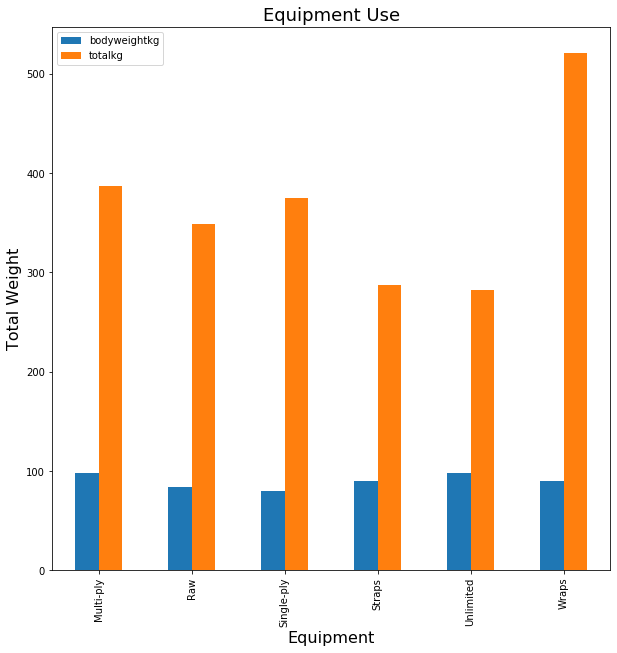

In [18]:
bargr = powerlifting_base.groupby(['equipment'])['bodyweightkg', 'totalkg'].mean()
ax = bargr.plot.bar(figsize=(10,10), stacked=False)
ax.set_title(f"Equipment Use", fontsize = 18)
ax.set_xlabel("Equipment", fontsize = 16)
ax.set_ylabel("Total Weight", fontsize = 16)

plt.savefig("visualizations/equipment_use2.png")

C:\Users\j1-ag\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\j1-ag\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


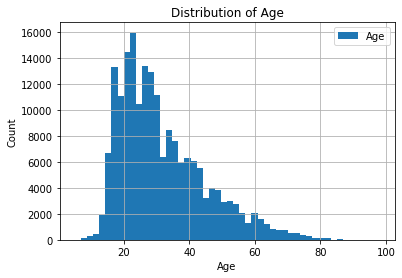

In [19]:
#histograph for age of comp

plt.hist(powerlifting_base["age"], bins=50, label="Age")
plt.ylabel('Count')
plt.xlabel('Age')
plt.title(f"Distribution of Age")
plt.grid(zorder=0)
plt.legend(loc="upper right")

plt.savefig("visualizations/age.png")
plt.show()

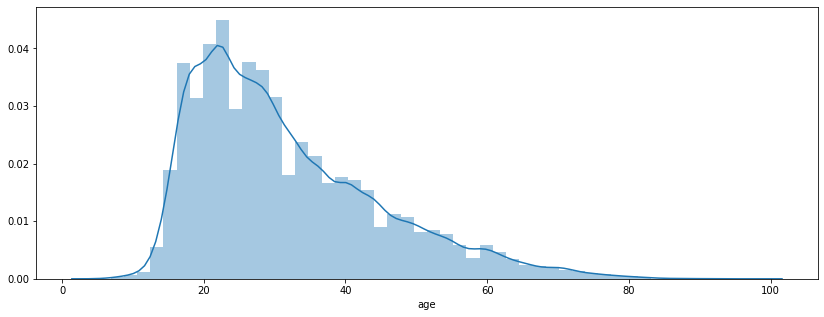

In [21]:
#dropna() - is it deleting rows and columns that have NaN
fig=plt.figure(figsize=(14,5))
sns.distplot(powerlifting_base['age'].dropna(), kde=True)
plt.savefig("visualizations/histowline.png")

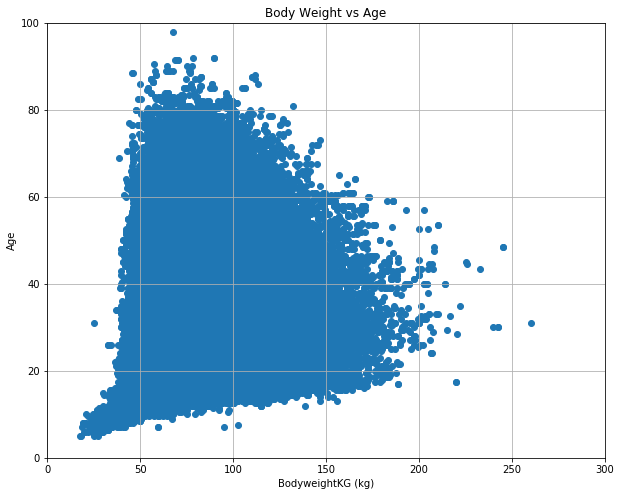

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(powerlifting_base['bodyweightkg'], powerlifting_base['age'])
plt.ylabel('Age')
plt.xlabel('BodyweightKG (kg)')
plt.title('Body Weight vs Age')
plt.xlim(0, 300)
plt.ylim(0,100)
plt.grid()
plt.savefig("visualizations/scatter1.png")
plt.show()

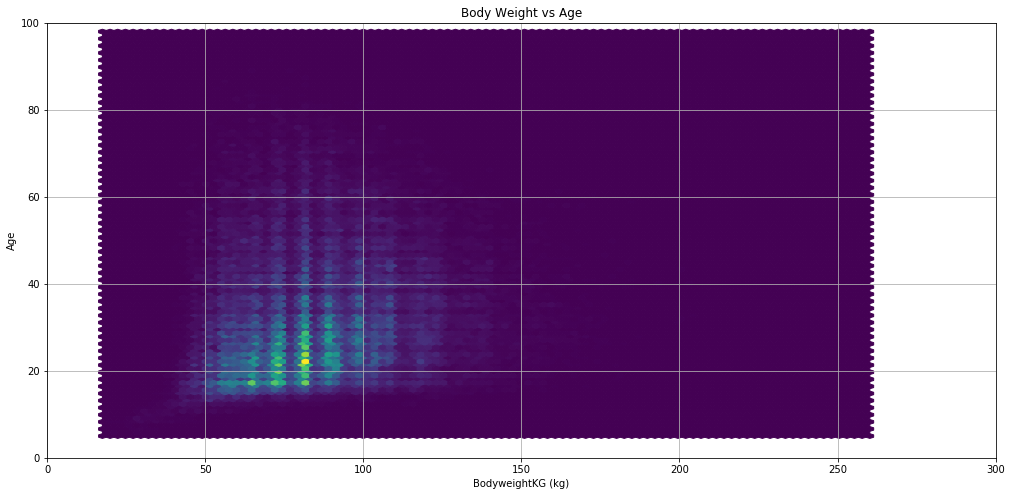

In [25]:
plt.figure(figsize=(17,8))
plt.hexbin(powerlifting_base['bodyweightkg'], powerlifting_base['age'])
plt.ylabel('Age')
plt.xlabel('BodyweightKG (kg)')
plt.title('Body Weight vs Age')
plt.xlim(0, 300)
plt.ylim(0,100)
plt.grid()
plt.savefig("visualizations/hexbin.png")
plt.show()

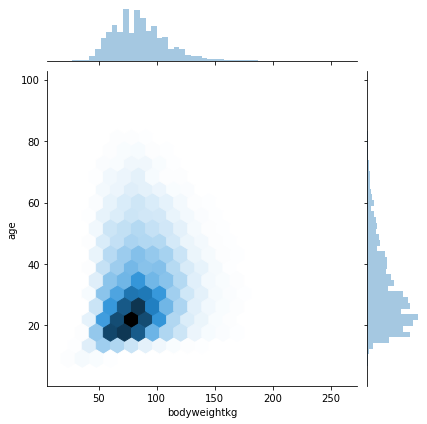

In [26]:
#Analog scatterplot is jointplot in seaborn
sns.jointplot(x='bodyweightkg', y='age', data=powerlifting_base, kind='hex', gridsize=20)
plt.savefig("visualizations/hexbin2.png")

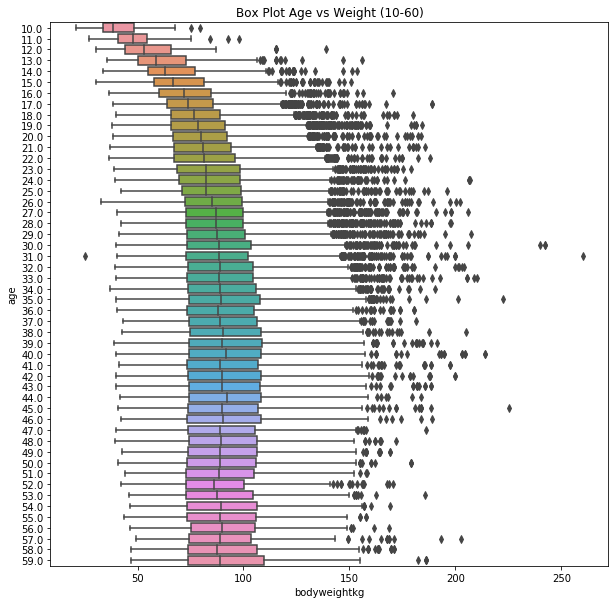

In [28]:
#Useful thing: inter-quantile percentile plot
fig=plt.figure(figsize=(10,10))
sns.boxplot(y='age', x='bodyweightkg', data=powerlifting_base[powerlifting_base.age.isin(np.arange(10,60,1))], orient='h')
plt.title('Box Plot Age vs Weight (10-60)')
plt.savefig("visualizations/boxplot.png")

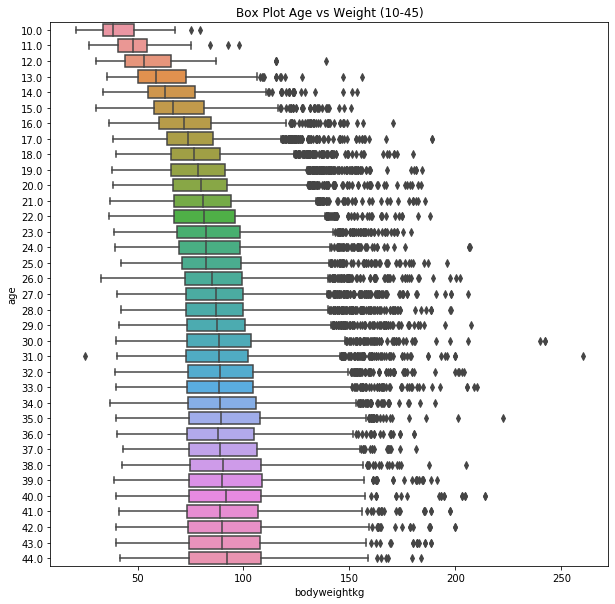

In [29]:
#Useful thing: inter-quantile percentile plot
fig=plt.figure(figsize=(10,10))
sns.boxplot(y='age', x='bodyweightkg', data=powerlifting_base[powerlifting_base.age.isin(np.arange(10,45,1))], orient='h')
plt.title('Box Plot Age vs Weight (10-45)')
plt.savefig("visualizations/boxplot2.png")

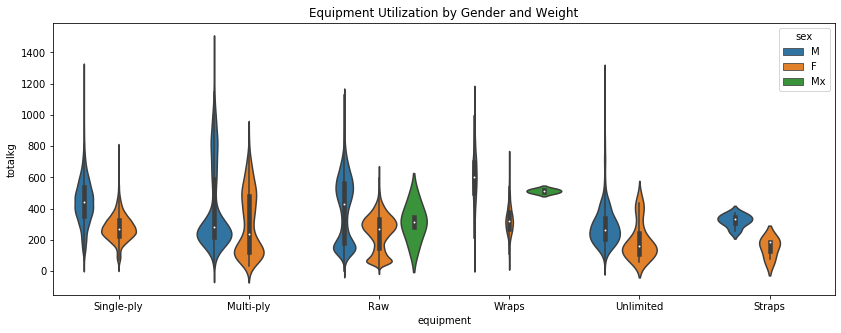

In [30]:
#Bimodal distribution
fig=plt.figure(figsize=(14,5))
sns.violinplot(y='totalkg', x='equipment', hue='sex', split=False, data=powerlifting_base)
plt.title('Equipment Utilization by Gender and Weight')
plt.savefig("visualizations/violin.png")

<Figure size 360x360 with 0 Axes>

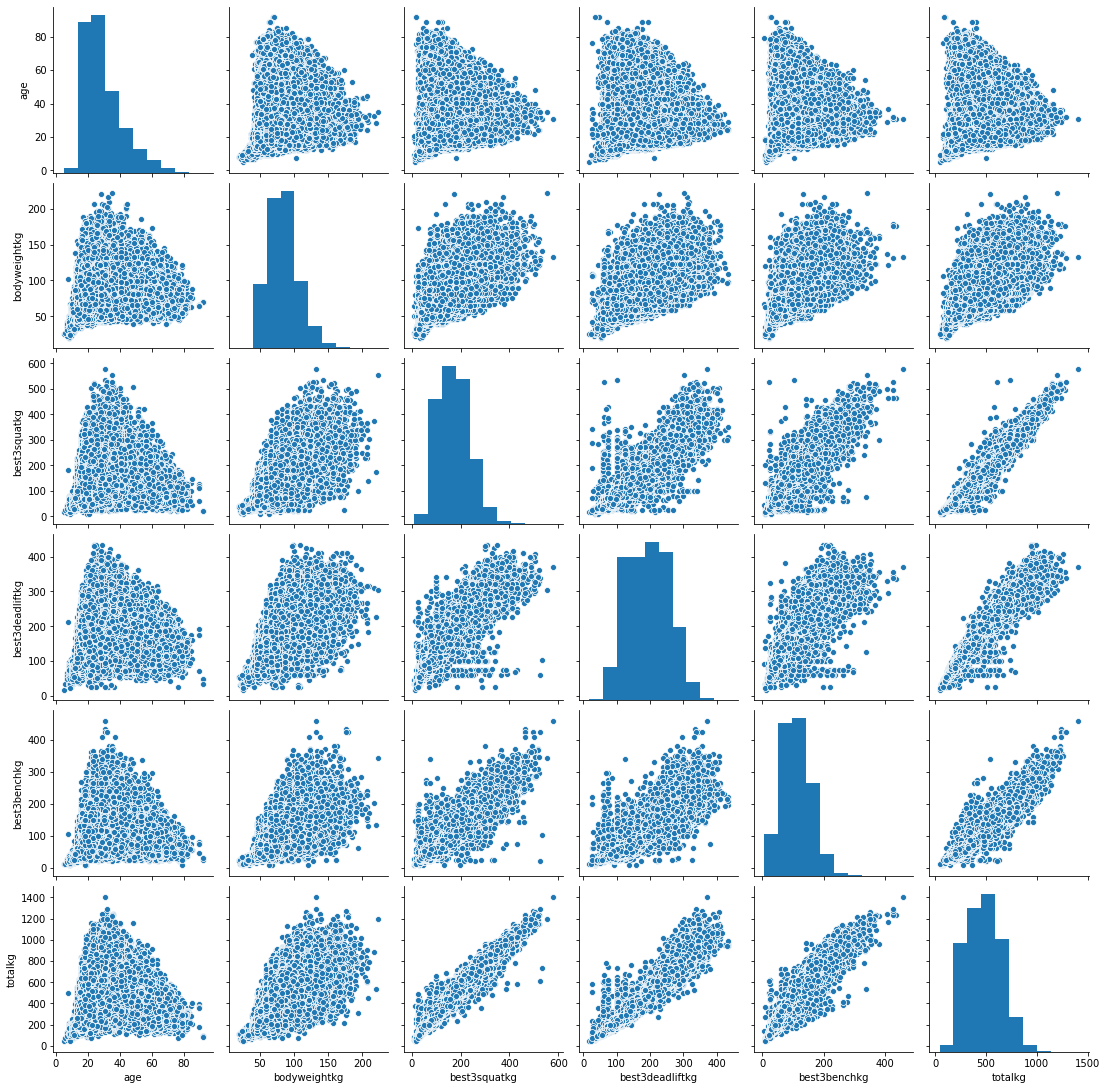

In [32]:
#Pairwise dependencies
fig=plt.figure(figsize=(5,5))
cols=['equipment','age', 'bodyweightkg', 'weightclasskg', 'best3squatkg', 'best3deadliftkg', 'best3benchkg', 'place', 'totalkg', 'sex']
sns_plot=sns.pairplot(powerlifting_base[cols].dropna())
plt.savefig("visualizations/scatter and bar.png")


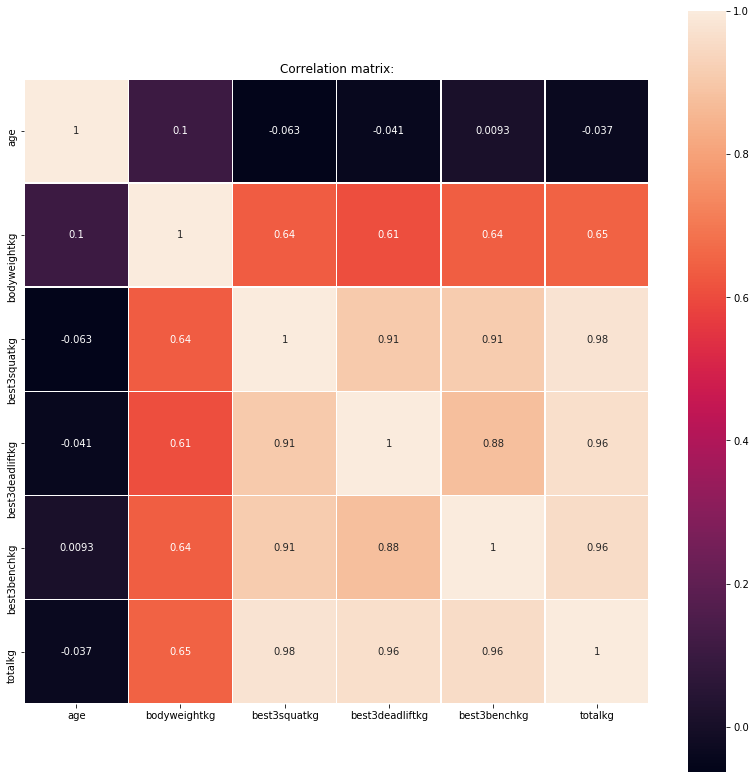

In [33]:
#matrix plot
fig=plt.figure(figsize=(14,14))
sns.heatmap(powerlifting_base.dropna().corr(), square = True, annot = True, linewidths = .5)
plt.title("Correlation matrix:")
plt.savefig("visualizations/matrix.png")
plt.show()

In [35]:
#Linear Regression
#Collecting X and Y:
powerlifting_base = powerlifting_base.dropna()
X = powerlifting_base['best3squatkg'].values
Y = powerlifting_base['totalkg'].values
#Mean X and Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)
#Total number of values
n = len(X)
#Using the formula to calculate m and c in y=m*x+c
numer = 0
demon = 0
for i in range(n):
    numer += (X[i] - mean_X) * (Y[i] - mean_Y)
    demon += (X[i] - mean_X) ** 2
m = numer / demon
c = mean_Y - (m * mean_X)

print('m = ', m)
print('c = ', c)

m =  2.5071841377065898
c =  44.55943704897862


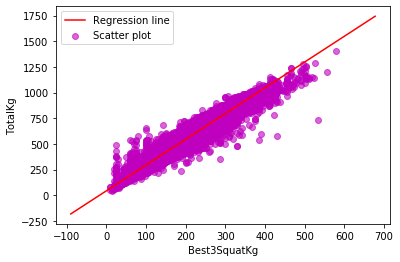

In [37]:
#visualize
max_x = np.max(X) + 100
min_x = np.min(X) - 100
#Calculating line values x and y
xx = np.linspace(min_x, max_x)
yy = m * xx + c
#Ploting line
plt.plot(xx, yy, color = 'r', label = 'Regression line')

#Ploting scatter points
plt.scatter(X, Y, color = 'm', label = 'Scatter plot',  alpha=0.6)

plt.xlabel('Best3SquatKg')
plt.ylabel('TotalKg')
plt.legend()
plt.savefig("visualizations/regression.png")
plt.show()

In [39]:
#Linear regression with multiple features by using the SCIKIT-LEARN library
X = powerlifting_base.loc[:, ('best3squatkg', 'best3deadliftkg', 'best3benchkg')] #independent features
Y = powerlifting_base.loc[:, 'totalkg'] #dependent features
#Breakdown of data into 50% training and 50% test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
Y_pred

array([484.99995093, 277.49979416, 590.00004547, ..., 532.49971216,
       654.99963513, 342.49982447])

In [40]:
Y_test

196615    485.00
69970     277.50
128850    590.00
177301    319.78
43237     507.50
           ...  
25256     325.00
45448     390.00
51638     532.50
105273    655.00
219307    342.50
Name: totalkg, Length: 42962, dtype: float64

In [41]:
print('Accuracy:', reg.score(X_test, Y_test))

Accuracy: 0.9999999964195422


In [42]:
#eval the accuracy of the model using (MSE and MAE)


mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print('mse: ', mse)
print('mae: ', mae)

mse:  0.00010349310260619793
mae:  0.0007323401927167023


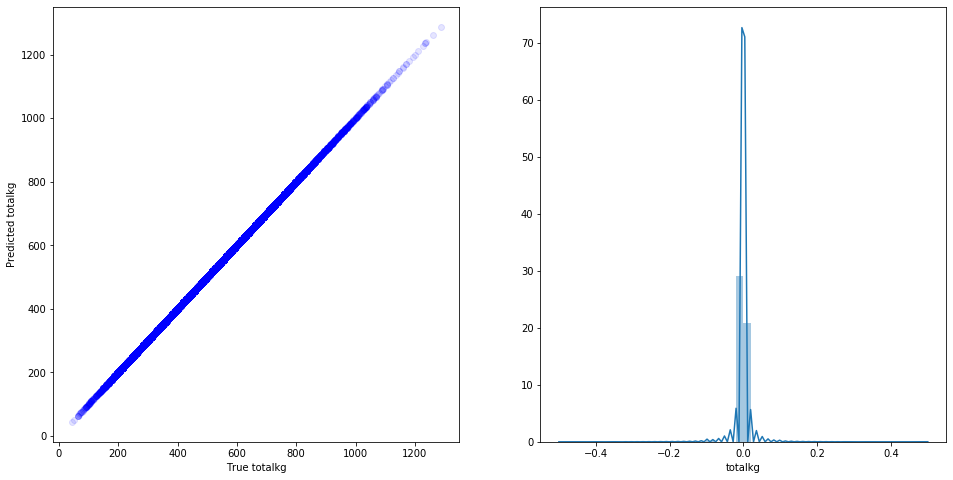

In [44]:
#We can visualize this
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
plt.scatter(Y_test, Y_pred, alpha=0.1, color = 'b')
plt.xlabel('True totalkg')
plt.ylabel('Predicted totalkg')
ax2 = fig.add_subplot(122)
sns.distplot(Y_test-Y_pred)
plt.savefig("visualizations/Predictive plot.png")


In [45]:
#Ridge regression with multiple features by using the SCIKIT-LEARN library
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, Y_train)
Y_pred = ridge.predict(X_test)
Y_pred


array([484.99995077, 277.49979481, 590.00004506, ..., 532.49971167,
       654.99963415, 342.49982528])

In [46]:
Y_test

196615    485.00
69970     277.50
128850    590.00
177301    319.78
43237     507.50
           ...  
25256     325.00
45448     390.00
51638     532.50
105273    655.00
219307    342.50
Name: totalkg, Length: 42962, dtype: float64

In [47]:
print('Accuracy: ', ridge.score(X_test, Y_test))

Accuracy:  0.9999999964195426


In [48]:
#eval the accuracy of the model using (MSE and MAE)


mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print('mse: ', mse)
print('mae: ', mae)

mse:  0.00010349309250383652
mae:  0.0007323064147829691


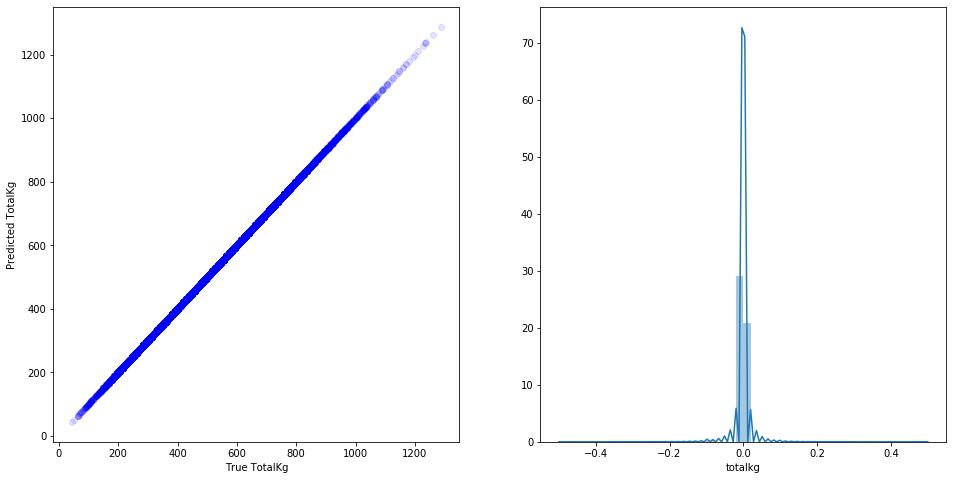

In [49]:
#We can visualize this
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
plt.scatter(Y_test, Y_pred, alpha=0.1, color = 'b')
plt.xlabel('True TotalKg')
plt.ylabel('Predicted TotalKg')
ax2 = fig.add_subplot(122)
sns.distplot(Y_test-Y_pred)
plt.savefig("visualizations/Predictive plot2.png")


In [50]:
#lasso
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, Y_train)
Y_pred = lasso.predict(X_test)
Y_pred

array([484.99736595, 277.52717176, 589.98388596, ..., 532.49097211,
       654.97454707, 342.52244441])

In [51]:
Y_test

196615    485.00
69970     277.50
128850    590.00
177301    319.78
43237     507.50
           ...  
25256     325.00
45448     390.00
51638     532.50
105273    655.00
219307    342.50
Name: totalkg, Length: 42962, dtype: float64

In [52]:
print('Accuracy: ', lasso.score(X_test, Y_test))

Accuracy:  0.9999999806904614


In [53]:
mse = mean_squared_error(Y_test, Y_pred) #1/N * sum(Y_test - Y_pred)^2
mae = mean_absolute_error(Y_test, Y_pred) #1/N * sum|Y_test - Y_pred|
print('mse: ', mse)
print('mae: ', mae)

mse:  0.00055814205932579
mae:  0.018192382771649352


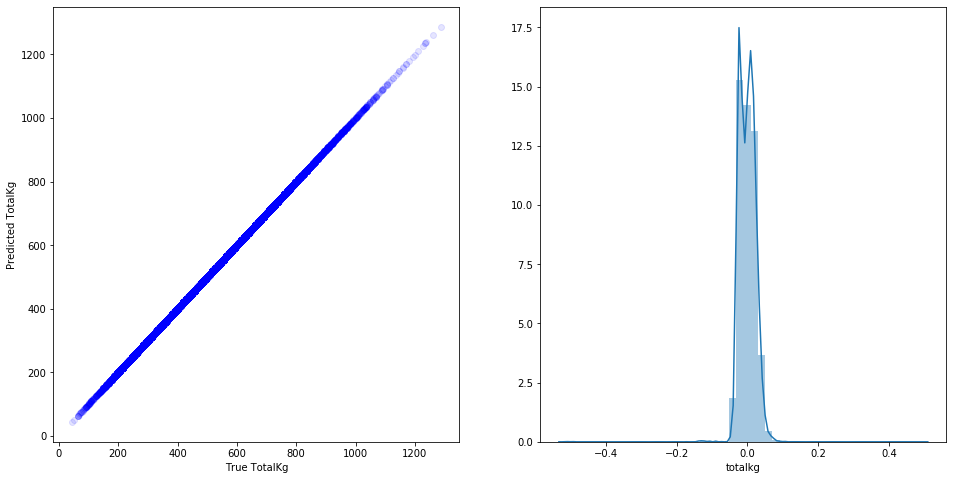

In [55]:
#We can visualize this
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
plt.scatter(Y_test, Y_pred, alpha=0.1, color = 'b')
plt.xlabel('True TotalKg')
plt.ylabel('Predicted TotalKg')
ax2 = fig.add_subplot(122)
sns.distplot(Y_test-Y_pred)
plt.savefig("visualizations/Predictive plot3.png")

In [56]:
#ElasticNet regression with multiple features by using the SCIKIT-LEARN library
from sklearn.linear_model import ElasticNet
elasticNet= ElasticNet().fit(X_train, Y_train)
Y_pred = elasticNet.predict(X_test)
Y_pred

array([484.99726144, 277.52717941, 589.98377656, ..., 532.49087724,
       654.97443778, 342.52257092])

In [57]:
Y_test

196615    485.00
69970     277.50
128850    590.00
177301    319.78
43237     507.50
           ...  
25256     325.00
45448     390.00
51638     532.50
105273    655.00
219307    342.50
Name: totalkg, Length: 42962, dtype: float64

In [58]:
print('Accuracy: ', lasso.score(X_test, Y_test))

Accuracy:  0.9999999806904614


In [59]:
mse = mean_squared_error(Y_test, Y_pred) #1/N * sum(Y_test - Y_pred)^2
mae = mean_absolute_error(Y_test, Y_pred) #1/N * sum|Y_test - Y_pred|
print('mse: ', mse)
print('mae: ', mae)

mse:  0.0005577486879895198
mae:  0.018188710574544277


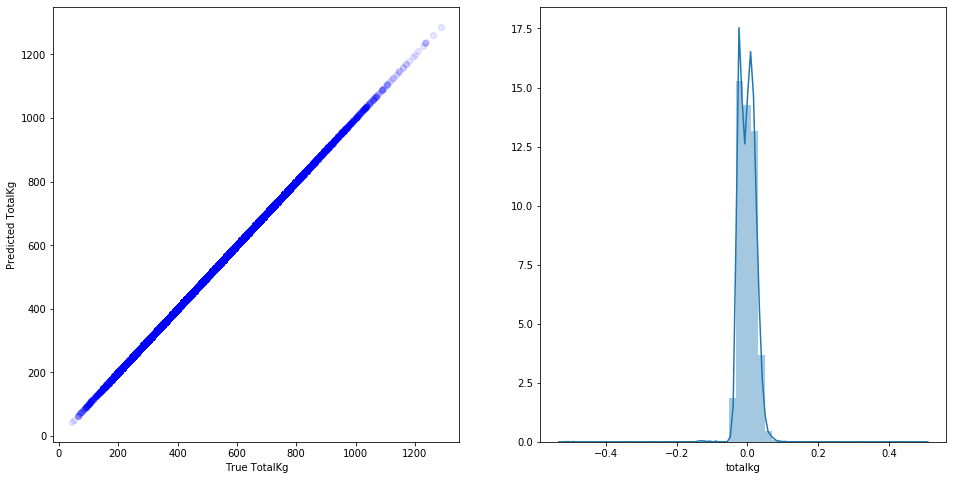

In [60]:
#We can visualize this
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
plt.scatter(Y_test, Y_pred, alpha=0.1, color = 'b')
plt.xlabel('True TotalKg')
plt.ylabel('Predicted TotalKg')
ax2 = fig.add_subplot(122)
sns.distplot(Y_test-Y_pred)
plt.savefig("visualizations/Predictive plot4.png")

In [61]:
from sklearn.ensemble import VotingRegressor
votingReg=VotingRegressor([('liReg',reg),('Lasso',lasso),('Ridge',ridge),('ElasticNet',elasticNet)]).fit(X_train, Y_train)
Y_pred = votingReg.predict(X_test)
Y_pred

array([484.99863227, 277.51348503, 589.99193826, ..., 532.49531829,
       654.98706353, 342.51116627])

In [62]:
Y_test

196615    485.00
69970     277.50
128850    590.00
177301    319.78
43237     507.50
           ...  
25256     325.00
45448     390.00
51638     532.50
105273    655.00
219307    342.50
Name: totalkg, Length: 42962, dtype: float64

In [63]:
print('Accuracy: ', votingReg.score(X_test, Y_test))

Accuracy:  0.9999999924756496


In [64]:
mse = mean_squared_error(Y_test, Y_pred) #1/N * sum(Y_test - Y_pred)^2
mae = mean_absolute_error(Y_test, Y_pred) #1/N * sum|Y_test - Y_pred|
print('mse: ', mse)
print('mae: ', mae)

mse:  0.00021749128977455946
mae:  0.009294438183528838


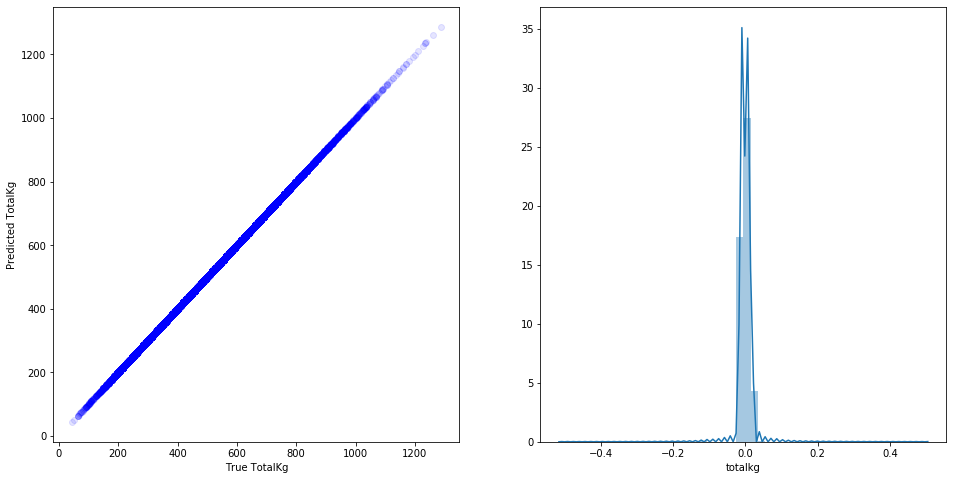

In [65]:
#We can visualize this
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
plt.scatter(Y_test, Y_pred, alpha=0.1, color = 'b')
plt.xlabel('True TotalKg')
plt.ylabel('Predicted TotalKg')
ax2 = fig.add_subplot(122)
sns.distplot(Y_test-Y_pred)
plt.savefig("visualizations/Predictive plot5.png")

In [66]:
#read CSV

lifters_df = powerlifting_base


In [67]:
lifters_df.reset_index(inplace=True, drop=True)
lifters_df.head(500000)

,equipment,age,country,division,bodyweightkg,weightclasskg,best3squatkg,best3deadliftkg,best3benchkg,totalkg,place,sex
0,Raw,32.5,Portugal,Open,66.80,67.5,130.0,195.0,60.0,385.0,1,F
1,Raw,23.0,Portugal,Junior,77.40,82.5,215.0,275.0,140.0,630.0,1,M
2,Raw,23.0,Portugal,Open,77.40,82.5,215.0,275.0,140.0,630.0,1,M
3,Raw,46.5,Portugal,Open,81.90,82.5,200.0,215.0,130.0,545.0,4,M
4,Raw,37.0,Portugal,Open,88.00,90,195.0,260.0,185.0,640.0,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...
85919,Wraps,40.5,USA,m1,97.98,100,207.5,220.0,182.5,610.0,1,M
85920,Wraps,18.5,USA,teen,67.13,67.5,155.0,185.0,97.5,437.5,1,M
85921,Wraps,26.5,USA,nov,98.52,100,182.5,192.5,97.5,472.5,2,M
85922,Wraps,12.0,USA,youth,86.18,90,70.0,80.0,42.5,192.5,1,M


In [68]:
#create html tbale
html_table = lifters_df.to_html()
len(html_table)

24358636

In [69]:
#write html table to text
lifters_df.to_html('table.html')